# Data Analysis by Municipio

In [37]:
#Import dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import scipy.stats as stats
from scipy.stats import linregress


### Hide warning messages in notebook

In [38]:
import warnings
warnings.filterwarnings('ignore')

### Read csv file from Coneval - INEGI

In [39]:
municipio_pov_dataload = "Resources/municipalpoverty.csv"
municipio_df = pd.read_csv(municipio_pov_dataload)
povertyindicators_dataload = "Resources/Concentrado, indicadores de pobreza.csv"
povertyindicators_df = pd.read_csv(povertyindicators_dataload)

In [40]:
municipaldata = pd.DataFrame(municipio_df)
new = municipaldata[['clave_entidad', 'entidad_federativa', 'clave_municipio', 'municipio', 'poblacion', 'pobreza', 'pobreza_pob']].copy()
new.head()

,clave_entidad,entidad_federativa,clave_municipio,municipio,poblacion,pobreza,pobreza_pob
0,1,Aguascalientes,1001,Aguascalientes,"861,446",26.1,"224,949"
1,1,Aguascalientes,1002,Asientos,"46,624",54,"25,169"
2,1,Aguascalientes,1003,Calvillo,"52,773",56.8,"29,951"
3,1,Aguascalientes,1004,Cosío,"15,321",43.2,"6,620"
4,1,Aguascalientes,1005,Jesús María,"125,750",25,"31,479"


### Filter data just from Mexico State and change head titles to English

In [41]:
mexico_state_df = new[new['entidad_federativa'].str.contains("México")]
poverty_by_municipality_df = mexico_state_df.rename(columns={"clave_entidad": "State ID",
                                    "entidad_federativa": "State", 
                                    "clave_municipio": "Municipality ID",
                                    "municipio": "Municipality",
                                    "poblacion": "Population",
                                    "pobreza": "% Poverty", 
                                    "pobreza_pob": "Total Population in Poverty"})

poverty_by_municipality_df

,State ID,State,Municipality ID,Municipality,Population,% Poverty,Total Population in Poverty
656,15,México,15001,Acambay,"62,863",73.5,"46,233"
657,15,México,15002,Acolman,"171,774",56.2,"96,512"
658,15,México,15003,Aculco,"46,275",61.9,"28,628"
659,15,México,15004,Almoloya de Alquisiras,"14,115",73.4,"10,354"
660,15,México,15005,Almoloya de Juárez,"179,746",59.9,"107,654"
...,...,...,...,...,...,...,...
776,15,México,15121,Cuautitlán Izcalli,"509,985",27.7,"141,173"
777,15,México,15122,Valle de Chalco Solidaridad,"452,170",59,"266,702"
778,15,México,15123,Luvianos,"24,639",84.9,"20,914"
779,15,México,15124,San José del Rincón,"84,040",76.3,"64,133"


### Show DataFrame for the second cvs that was imported

In [42]:
povertyindicators_df

,Clave de entidad,Entidad federativa,Clave de municipio,Municipio,Población 2015*\n(leer nota al final del cuadro),Porcentaje de Pobreza\n2015,Personas Pobres\n2015,Carencias promedio de Pobreza\n2015,Porcentaje Pobreza Extrema\n2015,Personas Pobreza Extrema\n2015,...,Carencias promedio Población con al menos una carencia social\n2015,Porcentaje Población con tres o más carencias sociales\n2015,Personas Población con tres o más carencias sociales\n2015,Carencias promedio\n Población con tres o más carencias sociales 2015,Porcentaje Población con ingreso inferior a la línea de bienestar \n2015,Personas Población con ingreso inferior a la línea de bienestar\n2015,Carencias promedio Población con ingreso inferior a la línea de bienestar\n2015,Porcentaje Población con ingreso inferior a la línea de bienestar mínimo\n2015,Personas Población con ingreso inferior a la línea de bienestar mínimo\n2015,Carencias promedio Población con ingreso inferior a la línea de bienestar mínimo\n2015
0,15,México,15001,Acambay,"62,863",73.5,"46,233",2.4,19.8,"12,475",...,2.3,39.2,"24,627",3.4,75.0,"47,164",2.4,37.1,"23,336",2.6
1,15,México,15002,Acolman,"171,774",56.2,"96,512",2.0,8.6,"14,715",...,1.9,19.2,"32,987",3.3,67.9,"116,692",1.7,24.3,"41,814",2.0
2,15,México,15003,Aculco,"46,275",61.9,"28,628",2.2,10.7,"4,930",...,2.1,29.0,"13,408",3.4,63.6,"29,419",2.2,23.8,"10,993",2.4
3,15,México,15004,Almoloya de Alquisiras,"14,115",73.4,"10,354",2.3,18.7,"2,638",...,2.2,34.4,"4,858",3.4,75.2,"10,616",2.2,37.5,"5,290",2.5
4,15,México,15005,Almoloya de Juárez,"179,746",59.9,"107,654",2.3,12.6,"22,666",...,2.2,28.9,"51,862",3.4,66.2,"118,999",2.1,25.3,"45,397",2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,15,México,15121,Cuautitlán Izcalli,"509,985",27.7,"141,173",1.9,2.8,"14,401",...,1.8,8.4,"43,048",3.3,43.0,"219,101",1.2,11.6,"59,110",1.6
121,15,México,15122,Valle de Chalco Solidaridad,"452,170",59.0,"266,702",2.1,9.5,"42,778",...,2.0,21.0,"94,843",3.3,71.2,"321,840",1.7,27.8,"125,851",2.0
122,15,México,15123,Luvianos,"24,639",84.9,"20,914",2.5,32.1,"7,911",...,2.4,44.7,"11,012",3.4,85.8,"21,145",2.5,54.4,"13,402",2.7
123,15,México,15124,San José del Rincón,"84,040",76.3,"64,133",2.6,22.8,"19,120",...,2.6,48.7,"40,958",3.4,76.4,"64,231",2.6,39.4,"33,153",2.7


## IMPORTANT STEP: We Filtered data by Municipality and decided to compare 3 variables for poverty measurement

In [43]:
povertyindicator = pd.DataFrame(povertyindicators_df)
new1 = povertyindicator[['Clave de municipio',
                         'Personas Rezago educativo\n2015', 
                         'Personas Carencia por acceso a los servicios de salud\n2015', 
                         'Personas Carencia por acceso a la seguridad social\n2015']].copy()

new2 = new1.rename(columns={"Clave de municipio": "Municipality ID",
                            "Personas Rezago educativo\n2015" : "People with education lag",
                            "Personas Carencia por acceso a los servicios de salud\n2015": "People without access to healthcare",
                            "Personas Carencia por acceso a la seguridad social\n2015": "People without social security"})
new2.head()


,Municipality ID,People with education lag,People without access to healthcare,People without social security
0,15001,"15,721","8,177","55,302"
1,15002,"19,176","34,621","107,655"
2,15003,"11,349","4,088","39,700"
3,15004,"3,811",986,"12,235"
4,15005,"39,433","22,250","132,743"


In [44]:
new2.dtypes

Municipality ID                         int64
People with education lag              object
People without access to healthcare    object
People without social security         object
dtype: object

In [45]:
mergepoverty = pd.merge(poverty_by_municipality_df, new2, on="Municipality ID", how="right")

mergepoverty['Total Population in Poverty'] = mergepoverty['Total Population in Poverty'].str.replace(',', '')
mergepoverty['People with education lag'] = mergepoverty['People with education lag'].str.replace(',', '')
mergepoverty['People without access to healthcare'] = mergepoverty['People without access to healthcare'].str.replace(',', '')
mergepoverty['People without social security'] = mergepoverty['People without social security'].str.replace(',', '')

mergepoverty

,State ID,State,Municipality ID,Municipality,Population,% Poverty,Total Population in Poverty,People with education lag,People without access to healthcare,People without social security
0,15,México,15001,Acambay,"62,863",73.5,46233,15721,8177,55302
1,15,México,15002,Acolman,"171,774",56.2,96512,19176,34621,107655
2,15,México,15003,Aculco,"46,275",61.9,28628,11349,4088,39700
3,15,México,15004,Almoloya de Alquisiras,"14,115",73.4,10354,3811,986,12235
4,15,México,15005,Almoloya de Juárez,"179,746",59.9,107654,39433,22250,132743
...,...,...,...,...,...,...,...,...,...,...
120,15,México,15121,Cuautitlán Izcalli,"509,985",27.7,141173,34153,111653,189795
121,15,México,15122,Valle de Chalco Solidaridad,"452,170",59,266702,71570,146256,299228
122,15,México,15123,Luvianos,"24,639",84.9,20914,8604,1204,21968
123,15,México,15124,San José del Rincón,"84,040",76.3,64133,32693,6730,79770


## DEBUGING STEP: We run a dtypes be able to run operations with integers / floats. Every time we reordered columns into a new dataframe, we had verify and to change types.

In [46]:
mergepoverty['Total Population in Poverty'] = mergepoverty['Total Population in Poverty'].astype(float)
mergepoverty['People with education lag'] = mergepoverty['People with education lag'].astype(float)
mergepoverty['People without access to healthcare'] = mergepoverty['People without access to healthcare'].astype(float)
mergepoverty['People without social security'] = mergepoverty['People without social security'].astype(float)
mergepoverty['Municipality ID'] = mergepoverty['Municipality ID'].astype(str).str.slice(2).astype(int)
mergepoverty

,State ID,State,Municipality ID,Municipality,Population,% Poverty,Total Population in Poverty,People with education lag,People without access to healthcare,People without social security
0,15,México,1,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0
1,15,México,2,Acolman,"171,774",56.2,96512.0,19176.0,34621.0,107655.0
2,15,México,3,Aculco,"46,275",61.9,28628.0,11349.0,4088.0,39700.0
3,15,México,4,Almoloya de Alquisiras,"14,115",73.4,10354.0,3811.0,986.0,12235.0
4,15,México,5,Almoloya de Juárez,"179,746",59.9,107654.0,39433.0,22250.0,132743.0
...,...,...,...,...,...,...,...,...,...,...
120,15,México,121,Cuautitlán Izcalli,"509,985",27.7,141173.0,34153.0,111653.0,189795.0
121,15,México,122,Valle de Chalco Solidaridad,"452,170",59,266702.0,71570.0,146256.0,299228.0
122,15,México,123,Luvianos,"24,639",84.9,20914.0,8604.0,1204.0,21968.0
123,15,México,124,San José del Rincón,"84,040",76.3,64133.0,32693.0,6730.0,79770.0


In [47]:
mergepoverty.dtypes

State ID                                 int64
State                                   object
Municipality ID                          int32
Municipality                            object
Population                              object
% Poverty                               object
Total Population in Poverty            float64
People with education lag              float64
People without access to healthcare    float64
People without social security         float64
dtype: object

In [48]:
mergepoverty_byid = mergepoverty.set_index('Municipality ID') 
mergepoverty_byid

,State ID,State,Municipality,Population,% Poverty,Total Population in Poverty,People with education lag,People without access to healthcare,People without social security
Municipality ID,,,,,,,,,
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0
2,15,México,Acolman,"171,774",56.2,96512.0,19176.0,34621.0,107655.0
3,15,México,Aculco,"46,275",61.9,28628.0,11349.0,4088.0,39700.0
4,15,México,Almoloya de Alquisiras,"14,115",73.4,10354.0,3811.0,986.0,12235.0
5,15,México,Almoloya de Juárez,"179,746",59.9,107654.0,39433.0,22250.0,132743.0
...,...,...,...,...,...,...,...,...,...
121,15,México,Cuautitlán Izcalli,"509,985",27.7,141173.0,34153.0,111653.0,189795.0
122,15,México,Valle de Chalco Solidaridad,"452,170",59,266702.0,71570.0,146256.0,299228.0
123,15,México,Luvianos,"24,639",84.9,20914.0,8604.0,1204.0,21968.0


In [49]:
denue_df  = pd.read_csv('Output/DENUE_Filtered.csv')
denue_df.head()


,Unnamed: 0,Unnamed: 0.1,Código Tipo de Industria,ID,Nombre de la Unidad Económica,Razón social,Código de la clase de actividad SCIAN,Nombre de clase de la actividad,Descripcion estrato personal ocupado,Tipo de vialidad,...,Localidad,Área geoestadí­stica básica,Manzana,NÃÂºmero de telÃÂ©fono,Correo electrÃÂ³nico,Sitio en Internet,Tipo de establecimiento,Latitud,Longitud,Fecha de incorporación al DENUE
0,0,174704,46,2511586,LONJA MERCANTIL HERNANDEZ,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,...,SAN BARTOLOMÃÂ ATLATLAHUCA,216,4,7.171710e+09,NaN,NaN,Fijo,19.069133,-99.611156,jul-10
1,1,540472,81,2363713,ESTÃÂTICA UNISEX DIANA,NaN,812110,Salones y clÃÂ­nicas de belleza y peluquerÃÂ­as,0 a 5 personas,CALLE,...,IXTAPALUCA,904,12,NaN,NaN,NaN,Fijo,19.290680,-98.902444,dic-14
2,2,23013,31,2032449,TORTILLERÃÂA 599,NaN,311830,ElaboraciÃÂ³n de tortillas de maÃÂ­z y molie...,0 a 5 personas,CALLE,...,CIUDAD NEZAHUALCÃÂYOTL,1289,5,NaN,NaN,NaN,Fijo,19.389040,-99.015859,dic-14
3,3,86301,46,2002299,ABARROTES SIN NOMBRE,NaN,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,AVENIDA,...,TULTEPEC,335,8,NaN,NaN,NaN,Fijo,19.680749,-99.136141,jul-10
4,4,399216,56,2249276,INTERNET MIP,NaN,561432,Servicios de acceso a computadoras,0 a 5 personas,CALLE,...,SAN SEBASTIÃÂN,359,16,NaN,NaN,NaN,Fijo,19.787891,-99.055222,dic-14


In [50]:
denue_df = denue_df [['Clave municipio', 
                      'Código Postal',
                      'Código Tipo de Industria',
                      'Descripcion estrato personal ocupado']]
denue_en = denue_df.rename(columns={"Clave municipio": "Municipality ID",
                            "Código Postal" : "Zip Code",
                            "Código Tipo de Industria": "Industry Code",
                            "Descripcion estrato personal ocupado": "Company Size"})
denue_en.head()

,Municipality ID,Zip Code,Industry Code,Company Size
0,90,52350,46,0 a 5 personas
1,39,56560,81,0 a 5 personas
2,58,57750,31,0 a 5 personas
3,108,54960,46,0 a 5 personas
4,120,55600,56,0 a 5 personas


## IMPORTANT STEP: Merge cleaned dataframes to compare and run analysis

In [51]:
poverty_final = pd.merge(mergepoverty_byid, denue_en, on="Municipality ID", how="right")
poverty_final = poverty_final.set_index('Municipality ID') 
poverty_final

,State ID,State,Municipality,Population,% Poverty,Total Population in Poverty,People with education lag,People without access to healthcare,People without social security,Zip Code,Industry Code,Company Size
Municipality ID,,,,,,,,,,,,
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50300,46,0 a 5 personas
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50337,81,0 a 5 personas
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50300,56,0 a 5 personas
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50337,33,0 a 5 personas
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50300,62,0 a 5 personas
...,...,...,...,...,...,...,...,...,...,...,...,...
125,15,México,Tonanitla,"10,190",49.6,5055.0,1360.0,2669.0,6951.0,55789,46,0 a 5 personas
125,15,México,Tonanitla,"10,190",49.6,5055.0,1360.0,2669.0,6951.0,55789,46,0 a 5 personas
125,15,México,Tonanitla,"10,190",49.6,5055.0,1360.0,2669.0,6951.0,55789,31,0 a 5 personas


## IMPORTANT STEP: Create plots and linear regressions testing the 3 indicators of poverty vs % Poverty to identify if they are correlated

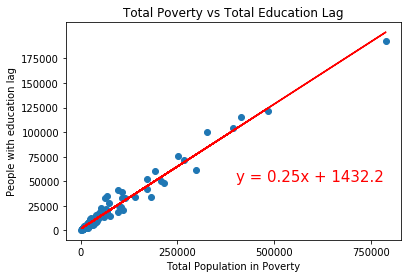

<Figure size 432x288 with 0 Axes>

In [52]:
population = mergepoverty.iloc[:,6]
education_lag = mergepoverty.iloc[:,7]
(mr_slope, mr_intercept, mr_rvalue, mr_pvalue, mr_stderr) = linregress(population, education_lag)
mr_regress_values = population * mr_slope + mr_intercept
line_eq = "y = " + str(round(mr_slope,2)) + "x + " + str(round(mr_intercept,2))
education_plot = plt.scatter(mergepoverty['Total Population in Poverty'],mergepoverty['People with education lag'])
plt.plot (population, mr_regress_values, "r-")
plt.annotate(line_eq,(400000,50000),fontsize=15,color="red")
plt.xlabel("Total Population in Poverty")
plt.ylabel("People with education lag")
plt.title ("Total Poverty vs Total Education Lag")
plt.xticks(np.arange(0, 800000, step = 250000))
plt.yticks(np.arange(0, 200000, step = 25000))


plt.show(education_plot)
plt.savefig('education_plot.png')

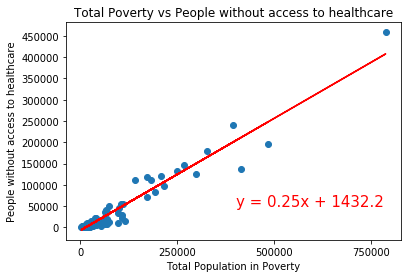

<Figure size 432x288 with 0 Axes>

In [53]:
healthcare = mergepoverty.iloc[:,8]
(hl_slope, hl_intercept, hl_rvalue, hl_pvalue, hl_stderr) = linregress(population, healthcare)
hl_regress_values = population * hl_slope + hl_intercept
line_eq_hl = "y = " + str(round(hl_slope,2)) + "x + " + str(round(hl_intercept,2))
healthcare_plot = plt.scatter(mergepoverty['Total Population in Poverty'],mergepoverty['People without access to healthcare'])
plt.plot (population, hl_regress_values, "r-")
plt.annotate(line_eq,(400000,50000),fontsize=15,color="red")
plt.xlabel("Total Population in Poverty")
plt.ylabel("People without access to healthcare")
plt.title ("Total Poverty vs People without access to healthcare")
plt.xticks(np.arange(0, 800000, step = 250000))
plt.yticks(np.arange(0, 500000, step = 50000))
plt.show(healthcare_plot)

plt.savefig('healthcare_plot.png')

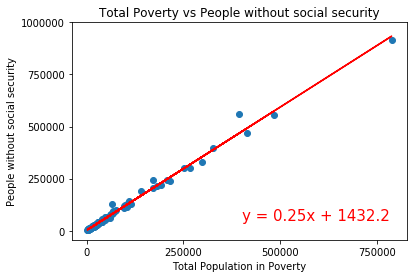

<Figure size 432x288 with 0 Axes>

In [54]:
social_security = mergepoverty.iloc[:,9]
(ss_slope, ss_intercept, ss_rvalue, ss_pvalue, ss_stderr) = linregress(population, social_security)
ss_regress_values = population * ss_slope + ss_intercept
line_eq_ss = "y = " + str(round(ss_slope,2)) + "x + " + str(round(ss_intercept,2))
socialsecurity_plot = plt.scatter(mergepoverty['Total Population in Poverty'],mergepoverty['People without social security'])
plt.plot (population, ss_regress_values, "r-")
plt.annotate(line_eq,(400000,50000),fontsize=15,color="red")
plt.xlabel("Total Population in Poverty")
plt.ylabel("People without social security")
plt.title ("Total Poverty vs People without social security")
plt.xticks(np.arange(0, 800000, step = 250000))
plt.yticks(np.arange(0, 1250000, step = 250000))
plt.show(socialsecurity_plot)

plt.savefig('socialsecurity_plot.png')

In [55]:
poverty_final_v2 = poverty_final



### Tag the companies according to industry and size

In [56]:
#poverty_final_v2["industry_type"]= poverty_final_v2.loc[poverty_final_v2["Industry Code"].isin(['11','21']),'industry_type']='Primary Sector'
#poverty_final_v2["industry_type"]= poverty_final_v2.loc[poverty_final_v2["Industry Code"].isin(['22', '23', '31', '32', '33', '56', '72']),'industry_type']='Sedondary Sector'
#poverty_final_v2["industry_type"]= poverty_final_v2.loc[poverty_final_v2["Industry Code"].isin(['43', '46', '48', '49', '51', '52', '53', '54', '55', '61', '62', '71', '93']),'industry_type']='Terciary Sector'

poverty_final_v2["industry_type"]=''
poverty_final_v2.loc[poverty_final_v2["Industry Code"].isin(['11','21']),'industry_type']='Primary Sector'
poverty_final_v2.loc[poverty_final_v2["Industry Code"].isin(['22', '23', '31', '32', '33', '56', '72']),'industry_type']='Secondary Sector'
poverty_final_v2.loc[poverty_final_v2["Industry Code"].isin(['43', '46', '48', '49', '51', '52', '53', '54', '55', '61', '62', '71',' 81', '93']),'industry_type']='Tertiary Sector'


poverty_final_v2["company_size_2"]=''
poverty_final_v2.loc[poverty_final_v2["Company Size"].isin(['0 a 5 personas']),'company_size_2']='Micro'
poverty_final_v2.loc[poverty_final_v2["Company Size"].isin(['6 a 10 personas', '11 a 30 personas']),'company_size_2']='Small'
poverty_final_v2.loc[poverty_final_v2["Company Size"].isin(['31 a 50 personas', '51 a 100 personas', '101 a 250 personas']),'company_size_2']='Medium'
poverty_final_v2.loc[poverty_final_v2["Company Size"].isin(['251 y mÃ¡s personas','251 y más personas']),'company_size_2']='Big'



poverty_final_v2

,State ID,State,Municipality,Population,% Poverty,Total Population in Poverty,People with education lag,People without access to healthcare,People without social security,Zip Code,Industry Code,Company Size,industry_type,company_size_2
Municipality ID,,,,,,,,,,,,,,
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50300,46,0 a 5 personas,Tertiary Sector,Micro
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50337,81,0 a 5 personas,Tertiary Sector,Micro
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50300,56,0 a 5 personas,Secondary Sector,Micro
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50337,33,0 a 5 personas,Secondary Sector,Micro
1,15,México,Acambay,"62,863",73.5,46233.0,15721.0,8177.0,55302.0,50300,62,0 a 5 personas,Tertiary Sector,Micro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,15,México,Tonanitla,"10,190",49.6,5055.0,1360.0,2669.0,6951.0,55789,46,0 a 5 personas,Tertiary Sector,Micro
125,15,México,Tonanitla,"10,190",49.6,5055.0,1360.0,2669.0,6951.0,55789,46,0 a 5 personas,Tertiary Sector,Micro
125,15,México,Tonanitla,"10,190",49.6,5055.0,1360.0,2669.0,6951.0,55789,31,0 a 5 personas,Secondary Sector,Micro


### Run validations that objects were calculated ok

In [57]:
ddd = poverty_final_v2.groupby("industry_type")
ddd1 = ddd["Industry Code"].value_counts()
display(ddd1.head(50))

ddd2 = poverty_final_v2.groupby("company_size_2")
ddd3 = ddd2["Company Size"].value_counts()
display(ddd3.head(50))


industry_type     Industry Code
Primary Sector    11                  19
                  21                  17
Secondary Sector  72                7255
                  31                3823
                  56                1746
                  33                1574
                  32                 988
                  23                 121
                  22                  63
Tertiary Sector   46               35625
                  81               10419
                  62                2470
                  61                2091
                  43                1864
                  93                1050
                  54                1017
                  71                 962
                  53                 758
                  52                 445
                  51                 185
                  48                 150
                  49                  25
                  55                   3
Name: Industry Code, dtyp

company_size_2  Company Size      
Big             251 y más personas      134
Medium          31 a 50 personas        452
                51 a 100 personas       315
                101 a 250 personas      209
Micro           0 a 5 personas        66784
Small           6 a 10 personas        2794
                11 a 30 personas       1982
Name: Company Size, dtype: int64

### convert objects into dataframe

In [58]:
grouped_by_municipality = poverty_final_v2.groupby("Municipality")
pct_of_industry = grouped_by_municipality["industry_type"].value_counts()

Municipality_vs_ind_df = pd.DataFrame({"Industry Counts" : pct_of_industry })

Municipality_vs_ind_df_2 = pd.DataFrame(Municipality_vs_ind_df.reset_index())

Municipality_vs_ind_df_2.head()


,Municipality,industry_type,Industry Counts
0,Acambay,Tertiary Sector,115
1,Acambay,Secondary Sector,50
2,Acambay,Primary Sector,1
3,Acolman,Tertiary Sector,619
4,Acolman,Secondary Sector,164


In [59]:
Municipality_vs_ind_df_3 = Municipality_vs_ind_df_2.set_index(["industry_type","Municipality"]).unstack(level=0)
Municipality_vs_ind_df_3.head()

Industry Counts                                 
industry_type           Primary Sector Secondary Sector Tertiary Sector
Municipality                                                           
Acambay                            1.0             50.0           115.0
Acolman                            NaN            164.0           619.0
Aculco                             NaN             16.0            67.0
Almoloya de Alquisiras             NaN             10.0            51.0
Almoloya de Juárez                 1.0             61.0           240.0

### Set percentages to make comparable between municipalities

In [60]:
Municipality_vs_ind_df_3 = Municipality_vs_ind_df_3.fillna(0)
Municipality_vs_ind_df_3["Total Companies"] = Municipality_vs_ind_df_3["Industry Counts"]["Primary Sector"] + Municipality_vs_ind_df_3["Industry Counts"]["Secondary Sector"] +  Municipality_vs_ind_df_3["Industry Counts"]["Tertiary Sector"]
Municipality_vs_ind_df_3["pct_Primary"] = Municipality_vs_ind_df_3["Industry Counts"]["Primary Sector"] / Municipality_vs_ind_df_3["Total Companies"]
Municipality_vs_ind_df_3["pct_Secondary"] = Municipality_vs_ind_df_3["Industry Counts"]["Secondary Sector"] / Municipality_vs_ind_df_3["Total Companies"]
Municipality_vs_ind_df_3["pct_Tertiary"] = Municipality_vs_ind_df_3["Industry Counts"]["Tertiary Sector"] / Municipality_vs_ind_df_3["Total Companies"]
Municipality_vs_ind_df_3

Industry Counts                                   \
industry_type           Primary Sector Secondary Sector Tertiary Sector   
Municipality                                                              
Acambay                            1.0             50.0           115.0   
Acolman                            0.0            164.0           619.0   
Aculco                             0.0             16.0            67.0   
Almoloya de Alquisiras             0.0             10.0            51.0   
Almoloya de Juárez                 1.0             61.0           240.0   
...                                ...              ...             ...   
Zacazonapan                        0.0              5.0            21.0   
Zacualpan                          0.0             11.0            36.0   
Zinacantepec                       1.0            131.0           569.0   
Zumpahuacán                        0.0              9.0            19.0   
Zumpango                           1.0            152.0           626.0   

                       Total Companies pct_Primary pct_Secondary pct_Tertiary  
industry_type                                                                  
Municipality                                                                   
Acambay                          166.0    0.006024      0.301205     0.692771  
Acolman                          783.0    0.000000      0.209451     0.790549  
Aculco                            83.0    0.000000      0.192771     0.807229  
Almoloya de Alquisiras            61.0    0.000000      0.163934     0.836066  
Almoloya de Juárez               302.0    0.003311      0.201987     0.794702  
...                                ...         ...           ...          ...  
Zacazonapan                       26.0    0.000000      0.192308     0.807692  
Zacualpan                         47.0    0.000000      0.234043     0.765957  
Zinacantepec                     701.0    0.001427      0.186876     0.811698  
Zumpahuacán                       28.0    0.000000      0.321429     0.678571  
Zumpango                         779.0    0.001284      0.195122     0.803594  

[125 rows x 7 columns]

### Repeat same procedure on company size

In [61]:
grouped_by_municipality = poverty_final_v2.groupby("Municipality")
pct_of_size = grouped_by_municipality["company_size_2"].value_counts()

Municipality_vs_compsize_df = pd.DataFrame({"Size Counts" : pct_of_size })

Municipality_vs_compsize_df_4 = pd.DataFrame(Municipality_vs_compsize_df.reset_index())
Municipality_vs_compsize_df_4.head()

,Municipality,company_size_2,Size Counts
0,Acambay,Micro,158
1,Acambay,Medium,4
2,Acambay,Small,4
3,Acolman,Micro,742
4,Acolman,Small,37


In [62]:
Municipality_vs_compsize_df_5 = Municipality_vs_compsize_df_4.set_index(["company_size_2","Municipality"]).unstack(level=0)
Municipality_vs_compsize_df_5.head()

Size Counts                    
company_size_2                 Big Medium  Micro Small
Municipality                                          
Acambay                        NaN    4.0  158.0   4.0
Acolman                        1.0    3.0  742.0  37.0
Aculco                         1.0    NaN   75.0   7.0
Almoloya de Alquisiras         NaN    NaN   55.0   6.0
Almoloya de Juárez             NaN    2.0  276.0  24.0

In [63]:
Municipality_vs_compsize_df_5 = Municipality_vs_compsize_df_5.fillna(0)
Municipality_vs_compsize_df_5["Total Companies"] = Municipality_vs_compsize_df_5["Size Counts"]["Big"] + Municipality_vs_compsize_df_5["Size Counts"]["Medium"] + Municipality_vs_compsize_df_5["Size Counts"]["Micro"] + Municipality_vs_compsize_df_5["Size Counts"]["Small"]
Municipality_vs_compsize_df_5["pct_Micro"] = Municipality_vs_compsize_df_5["Size Counts"]["Micro"] / Municipality_vs_compsize_df_5["Total Companies"]
Municipality_vs_compsize_df_5["pct_Small"] = Municipality_vs_compsize_df_5["Size Counts"]["Small"] / Municipality_vs_compsize_df_5["Total Companies"]
Municipality_vs_compsize_df_5["pct_Medium"] = Municipality_vs_compsize_df_5["Size Counts"]["Medium"] / Municipality_vs_compsize_df_5["Total Companies"]
Municipality_vs_compsize_df_5["pct_Big"] = Municipality_vs_compsize_df_5["Size Counts"]["Big"] / Municipality_vs_compsize_df_5["Total Companies"]

Municipality_vs_compsize_df_5

Size Counts                     Total Companies  \
company_size_2                 Big Medium  Micro Small                   
Municipality                                                             
Acambay                        0.0    4.0  158.0   4.0           166.0   
Acolman                        1.0    3.0  742.0  37.0           783.0   
Aculco                         1.0    0.0   75.0   7.0            83.0   
Almoloya de Alquisiras         0.0    0.0   55.0   6.0            61.0   
Almoloya de Juárez             0.0    2.0  276.0  24.0           302.0   
...                            ...    ...    ...   ...             ...   
Zacazonapan                    0.0    0.0   25.0   1.0            26.0   
Zacualpan                      0.0    2.0   45.0   0.0            47.0   
Zinacantepec                   1.0    5.0  660.0  35.0           701.0   
Zumpahuacán                    0.0    0.0   28.0   0.0            28.0   
Zumpango                       0.0    8.0  717.0  54.0           779.0   

                       pct_Micro pct_Small pct_Medium   pct_Big  
company_size_2                                                   
Municipality                                                     
Acambay                 0.951807  0.024096   0.024096  0.000000  
Acolman                 0.947637  0.047254   0.003831  0.001277  
Aculco                  0.903614  0.084337   0.000000  0.012048  
Almoloya de Alquisiras  0.901639  0.098361   0.000000  0.000000  
Almoloya de Juárez      0.913907  0.079470   0.006623  0.000000  
...                          ...       ...        ...       ...  
Zacazonapan             0.961538  0.038462   0.000000  0.000000  
Zacualpan               0.957447  0.000000   0.042553  0.000000  
Zinacantepec            0.941512  0.049929   0.007133  0.001427  
Zumpahuacán             1.000000  0.000000   0.000000  0.000000  
Zumpango                0.920411  0.069320   0.010270  0.000000  

[125 rows x 9 columns]

### Poverty % was string it needed to be converted to a float

In [64]:
poverty_final_v2['% Poverty'] = poverty_final_v2['% Poverty'].astype(float)
poverty_final_v2

povertybymunicip = grouped_by_municipality["% Poverty"].mean()
povertybymunicip
Poverty_df = pd.DataFrame({"% Poverty" : povertybymunicip})
Poverty_df

,% Poverty
Municipality,
Acambay,73.5
Acolman,56.2
Aculco,61.9
Almoloya de Alquisiras,73.4
Almoloya de Juárez,59.9
...,...
Zacazonapan,67.6
Zacualpan,76.1
Zinacantepec,53.3


### Merge the information into one dataframe

In [65]:
poverty_final_v3 = pd.merge(Municipality_vs_ind_df_3, Municipality_vs_compsize_df_5, on="Municipality", how="left")
poverty_final_v3 = pd.merge(poverty_final_v3, Poverty_df, on="Municipality", how="left")

poverty_final_v3

,"(Industry Counts, Primary Sector)","(Industry Counts, Secondary Sector)","(Industry Counts, Tertiary Sector)","(Total Companies_x, )","(pct_Primary, )","(pct_Secondary, )","(pct_Tertiary, )","(Size Counts, Big)","(Size Counts, Medium)","(Size Counts, Micro)","(Size Counts, Small)","(Total Companies_y, )","(pct_Micro, )","(pct_Small, )","(pct_Medium, )","(pct_Big, )",% Poverty
Municipality,,,,,,,,,,,,,,,,,
Acambay,1.0,50.0,115.0,166.0,0.006024,0.301205,0.692771,0.0,4.0,158.0,4.0,166.0,0.951807,0.024096,0.024096,0.000000,73.5
Acolman,0.0,164.0,619.0,783.0,0.000000,0.209451,0.790549,1.0,3.0,742.0,37.0,783.0,0.947637,0.047254,0.003831,0.001277,56.2
Aculco,0.0,16.0,67.0,83.0,0.000000,0.192771,0.807229,1.0,0.0,75.0,7.0,83.0,0.903614,0.084337,0.000000,0.012048,61.9
Almoloya de Alquisiras,0.0,10.0,51.0,61.0,0.000000,0.163934,0.836066,0.0,0.0,55.0,6.0,61.0,0.901639,0.098361,0.000000,0.000000,73.4
Almoloya de Juárez,1.0,61.0,240.0,302.0,0.003311,0.201987,0.794702,0.0,2.0,276.0,24.0,302.0,0.913907,0.079470,0.006623,0.000000,59.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zacazonapan,0.0,5.0,21.0,26.0,0.000000,0.192308,0.807692,0.0,0.0,25.0,1.0,26.0,0.961538,0.038462,0.000000,0.000000,67.6
Zacualpan,0.0,11.0,36.0,47.0,0.000000,0.234043,0.765957,0.0,2.0,45.0,0.0,47.0,0.957447,0.000000,0.042553,0.000000,76.1
Zinacantepec,1.0,131.0,569.0,701.0,0.001427,0.186876,0.811698,1.0,5.0,660.0,35.0,701.0,0.941512,0.049929,0.007133,0.001427,53.3


### Run Scatter plots and square-r for each variable

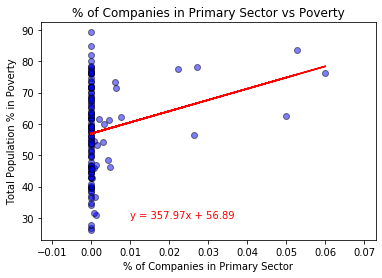

<Figure size 432x288 with 0 Axes>

In [67]:
y = poverty_final_v3.iloc[:,16]
x = poverty_final_v3.iloc[:,4]
(mr_slope, mr_intercept, mr_rvalue, mr_pvalue, mr_stderr) = linregress(x, y)
mr_regress_values = x * mr_slope + mr_intercept
line_eq = "y = " + str(round(mr_slope,2)) + "x + " + str(round(mr_intercept,2))
primary_plot = plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=.50)
plt.plot (x, mr_regress_values, "r-")
plt.annotate(line_eq,(.01,30),fontsize=10,color="red")
r = "r = " + str(round(mr_rvalue,4))
plt.annotate(r,(.01,15),fontsize=10,color="red")

plt.ylabel("Total Population % in Poverty")
plt.xlabel("% of Companies in Primary Sector")
plt.title ("% of Companies in Primary Sector vs Poverty")
#plt.xticks(np.arange(0, 800000, step = 250000))
#plt.yticks(np.arange(0, 200000, step = 25000))


plt.show(primary_plot)
plt.savefig('primary_act_plot.png')

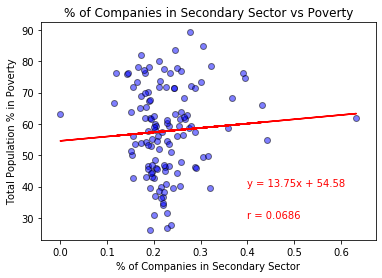

<Figure size 432x288 with 0 Axes>

In [68]:
y = poverty_final_v3.iloc[:,16]
x = poverty_final_v3.iloc[:,5]
(mr_slope, mr_intercept, mr_rvalue, mr_pvalue, mr_stderr) = linregress(x, y)
mr_regress_values = x * mr_slope + mr_intercept
line_eq = "y = " + str(round(mr_slope,2)) + "x + " + str(round(mr_intercept,2))
secondary_plot = plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=.50)
plt.plot (x, mr_regress_values, "r-")
plt.annotate(line_eq,(.4,40),fontsize=10,color="red")
r = "r = " + str(round(mr_rvalue,4))
plt.annotate(r,(.4,30),fontsize=10,color="red")

plt.ylabel("Total Population % in Poverty")
plt.xlabel("% of Companies in Secondary Sector")
plt.title ("% of Companies in Secondary Sector vs Poverty")
#plt.xticks(np.arange(0, 800000, step = 250000))
#plt.yticks(np.arange(0, 200000, step = 25000))


plt.show(primary_plot)
plt.savefig('secondary_act_plot.png')

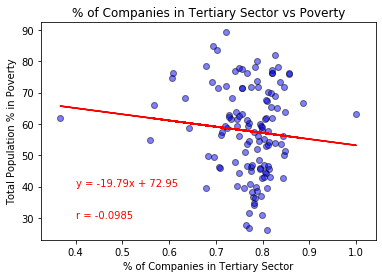

<Figure size 432x288 with 0 Axes>

In [69]:
y = poverty_final_v3.iloc[:,16]
x = poverty_final_v3.iloc[:,6]
(mr_slope, mr_intercept, mr_rvalue, mr_pvalue, mr_stderr) = linregress(x, y)
mr_regress_values = x * mr_slope + mr_intercept
line_eq = "y = " + str(round(mr_slope,2)) + "x + " + str(round(mr_intercept,2))
tertiary_plot = plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=.50)
plt.plot (x, mr_regress_values, "r-")
plt.annotate(line_eq,(.4,40),fontsize=10,color="red")
r = "r = " + str(round(mr_rvalue,4))
plt.annotate(r,(.4,30),fontsize=10,color="red")

plt.ylabel("Total Population % in Poverty")
plt.xlabel("% of Companies in Tertiary Sector")
plt.title ("% of Companies in Tertiary Sector vs Poverty")
#plt.xticks(np.arange(0, 800000, step = 250000))
#plt.yticks(np.arange(0, 200000, step = 25000))


plt.show()
plt.savefig('tertiary_act_plot.png')

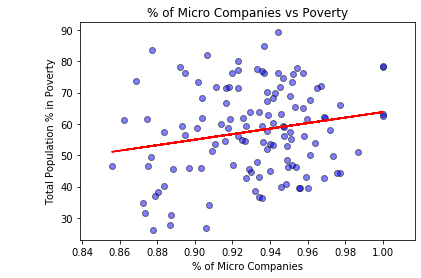

<Figure size 432x288 with 0 Axes>

In [70]:
y = poverty_final_v3.iloc[:,16]
x = poverty_final_v3.iloc[:,12]
(mr_slope, mr_intercept, mr_rvalue, mr_pvalue, mr_stderr) = linregress(x, y)
mr_regress_values = x * mr_slope + mr_intercept
line_eq = "y = " + str(round(mr_slope,2)) + "x + " + str(round(mr_intercept,2))
Micro_plot = plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=.50)
plt.plot (x, mr_regress_values, "r-")
plt.annotate(line_eq,(.8,40),fontsize=10,color="red")
r = "r = " + str(round(mr_rvalue,4))
plt.annotate(r,(.8,30),fontsize=10,color="red")

plt.ylabel("Total Population % in Poverty")
plt.xlabel("% of Micro Companies")
plt.title ("% of Micro Companies vs Poverty")
#plt.xticks(np.arange(0, 800000, step = 250000))
#plt.yticks(np.arange(0, 200000, step = 25000))


plt.show(primary_plot)
plt.savefig('Micro_plot.png')

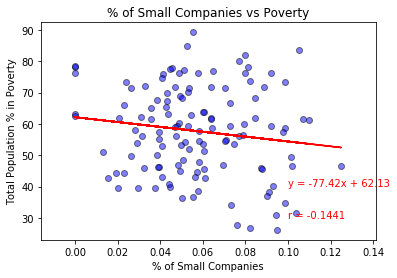

<Figure size 432x288 with 0 Axes>

In [71]:
y = poverty_final_v3.iloc[:,16]
x = poverty_final_v3.iloc[:,13]
(mr_slope, mr_intercept, mr_rvalue, mr_pvalue, mr_stderr) = linregress(x, y)
mr_regress_values = x * mr_slope + mr_intercept
line_eq = "y = " + str(round(mr_slope,2)) + "x + " + str(round(mr_intercept,2))
Small_plot = plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=.50)
plt.plot (x, mr_regress_values, "r-")
plt.annotate(line_eq,(.1,40),fontsize=10,color="red")
r = "r = " + str(round(mr_rvalue,4))
plt.annotate(r,(.1,30),fontsize=10,color="red")

plt.ylabel("Total Population % in Poverty")
plt.xlabel("% of Small Companies")
plt.title ("% of Small Companies vs Poverty")
#plt.xticks(np.arange(0, 800000, step = 250000))
#plt.yticks(np.arange(0, 200000, step = 25000))


plt.show(primary_plot)
plt.savefig('Small_plot.png')

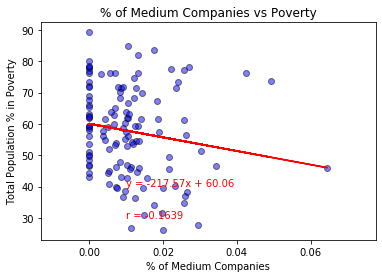

<Figure size 432x288 with 0 Axes>

In [72]:
y = poverty_final_v3.iloc[:,16]
x = poverty_final_v3.iloc[:,14]
(mr_slope, mr_intercept, mr_rvalue, mr_pvalue, mr_stderr) = linregress(x, y)
mr_regress_values = x * mr_slope + mr_intercept
line_eq = "y = " + str(round(mr_slope,2)) + "x + " + str(round(mr_intercept,2))
Medium_plot = plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black", alpha=.50)
plt.plot (x, mr_regress_values, "r-")
plt.annotate(line_eq,(.01,40),fontsize=10,color="red")
r = "r = " + str(round(mr_rvalue,4))
plt.annotate(r,(.01,30),fontsize=10,color="red")

plt.ylabel("Total Population % in Poverty")
plt.xlabel("% of Medium Companies")
plt.title ("% of Medium Companies vs Poverty")
#plt.xticks(np.arange(0, 800000, step = 250000))
#plt.yticks(np.arange(0, 200000, step = 25000))


plt.show()
plt.savefig('Medium_plot.png')

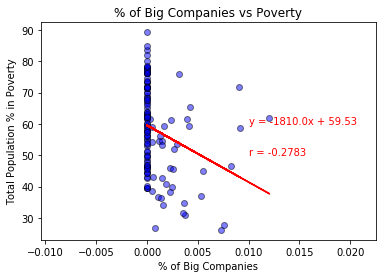

<Figure size 432x288 with 0 Axes>

In [73]:
y = poverty_final_v3.iloc[:,16]
x = poverty_final_v3.iloc[:,15]
(mr_slope, mr_intercept, mr_rvalue, mr_pvalue, mr_stderr) = linregress(x, y)
mr_regress_values = x * mr_slope + mr_intercept
line_eq = "y = " + str(round(mr_slope,2)) + "x + " + str(round(mr_intercept,2))
Big_plot = plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black", alpha=.50)
plt.plot (x, mr_regress_values, "r-")
plt.annotate(line_eq,(.01,60),fontsize=10,color="red")
r = "r = " + str(round(mr_rvalue,4))
plt.annotate(r,(.01,50),fontsize=10,color="red")

plt.ylabel("Total Population % in Poverty")
plt.xlabel("% of Big Companies")
plt.title ("% of Big Companies vs Poverty")
#plt.xticks(np.arange(0, 800000, step = 250000))
#plt.yticks(np.arange(0, 200000, step = 25000))


plt.show()
plt.savefig('Big_plot.png')

### Anova Tests by industry type

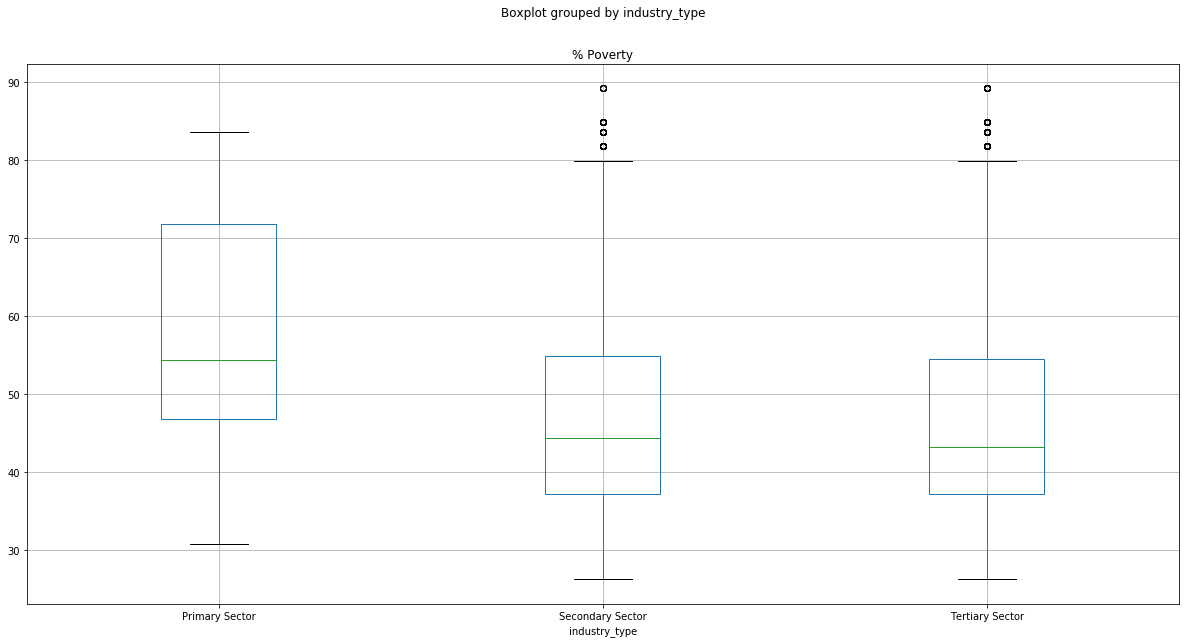

In [74]:
poverty_final_v2.boxplot("% Poverty", by="industry_type", figsize=(20, 10))

In [75]:
poverty_final_v2 = poverty_final_v2.fillna(0)
poverty_final_v2['% Poverty'] = poverty_final_v2['% Poverty'].astype(float)


group1 = poverty_final_v2[poverty_final_v2["industry_type"] == "Primary Sector"]["% Poverty"]
group2 = poverty_final_v2[poverty_final_v2["industry_type"] == "Secondary Sector"]["% Poverty"]
group3 = poverty_final_v2[poverty_final_v2["industry_type"] == "Tertiary Sector"]["% Poverty"]

In [76]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=19.438982725868303, pvalue=3.6309028444723085e-09)

### Anova Tests by company size

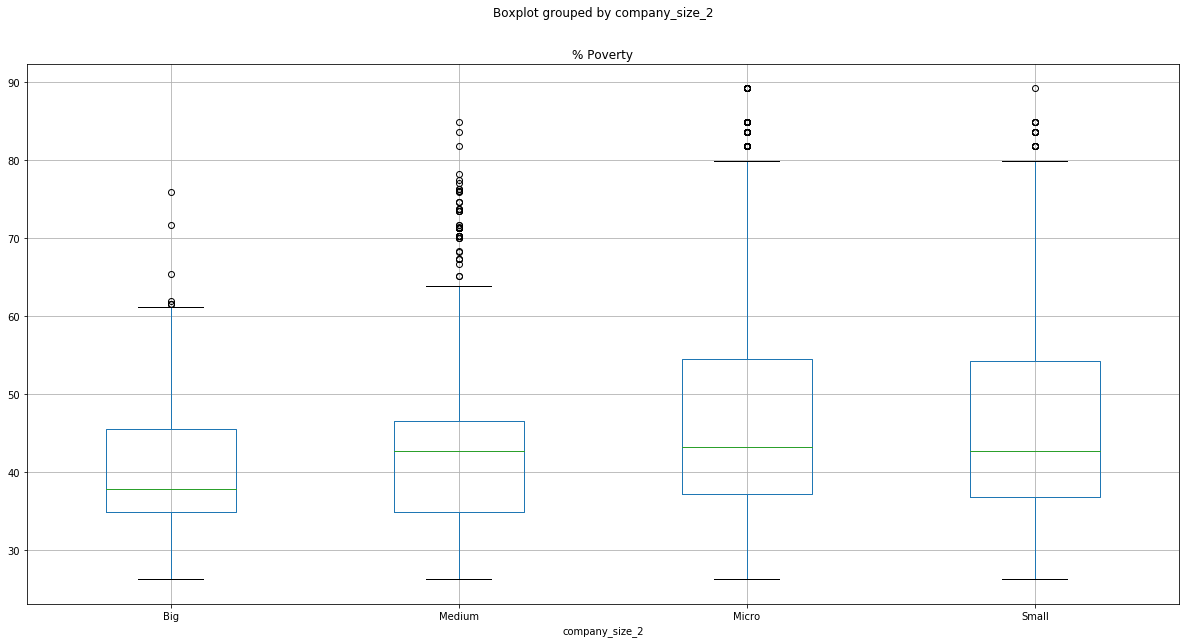

In [77]:
poverty_final_v2.boxplot("% Poverty", by="company_size_2", figsize=(20, 10))

In [78]:
group1 = poverty_final_v2[poverty_final_v2["company_size_2"] == "Micro"]["% Poverty"]
group2 = poverty_final_v2[poverty_final_v2["company_size_2"] == "Small"]["% Poverty"]
group3 = poverty_final_v2[poverty_final_v2["company_size_2"] == "Medium"]["% Poverty"]
group4 = poverty_final_v2[poverty_final_v2["company_size_2"] == "Big"]["% Poverty"]

In [79]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=62.344042730508534, pvalue=3.0082555175443978e-40)